In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
import acquire
import prepare

       species  sepal_length  sepal_width  petal_length  petal_width
0       setosa           5.1          3.5           1.4          0.2
1       setosa           4.9          3.0           1.4          0.2
2       setosa           4.7          3.2           1.3          0.2
3       setosa           4.6          3.1           1.5          0.2
4       setosa           5.0          3.6           1.4          0.2
5       setosa           5.4          3.9           1.7          0.4
6       setosa           4.6          3.4           1.4          0.3
7       setosa           5.0          3.4           1.5          0.2
8       setosa           4.4          2.9           1.4          0.2
9       setosa           4.9          3.1           1.5          0.1
10      setosa           5.4          3.7           1.5          0.2
11      setosa           4.8          3.4           1.6          0.2
12      setosa           4.8          3.0           1.4          0.1
13      setosa           4.3      

In [3]:
from acquire import get_titanic_data
df = get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,None,Queenstown,1
6,6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,1
7,7,0,3,male,2.0,3,1,21.0750,S,Third,None,Southampton,0
8,8,1,3,female,27.0,0,2,11.1333,S,Third,None,Southampton,0
9,9,1,2,female,14.0,1,0,30.0708,C,Second,None,Cherbourg,0


In [4]:
df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [5]:
df.embark_town.fillna('Other', inplace=True)

In [6]:
df.embark_town.value_counts()


Southampton    644
Cherbourg      168
Queenstown      77
Other            2
Name: embark_town, dtype: int64

In [7]:
df.drop(columns=['deck'], inplace=True)


In [8]:
df.embarked.head(10)


0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: embarked, dtype: object

In [9]:
df.embarked.value_counts(dropna=False)


S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [10]:
df = df[pd.notna(df.age)]
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


In [11]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

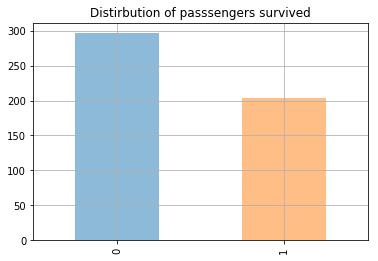

In [12]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

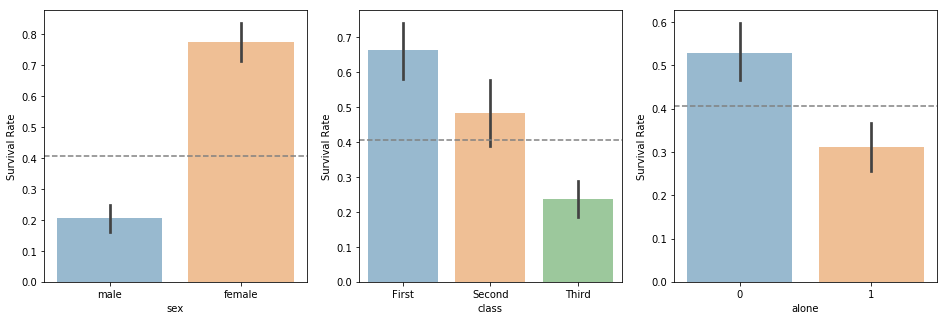

In [13]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

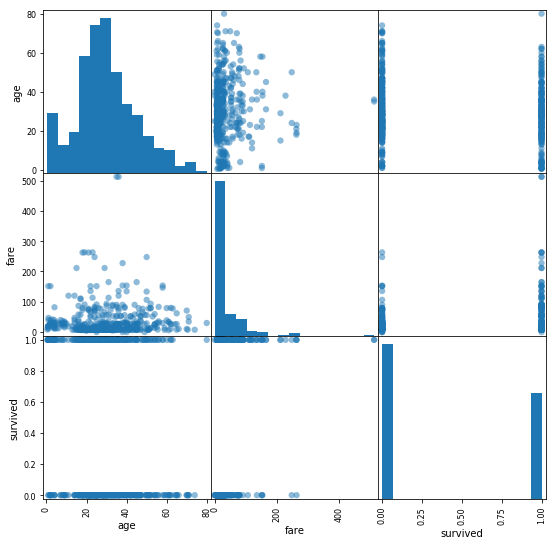

In [14]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

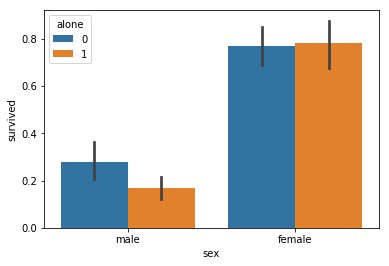

In [15]:
sns.barplot('sex','survived', data=train_df, hue='alone')

In [16]:
train_df.groupby(['sex','alone'])['survived'].count()

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [23]:
df_family = df[df['alone']== 0]
df_family.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
7,7,0,3,male,2.0,3,1,21.0750,S,Third,Southampton,0
8,8,1,3,female,27.0,0,2,11.1333,S,Third,Southampton,0


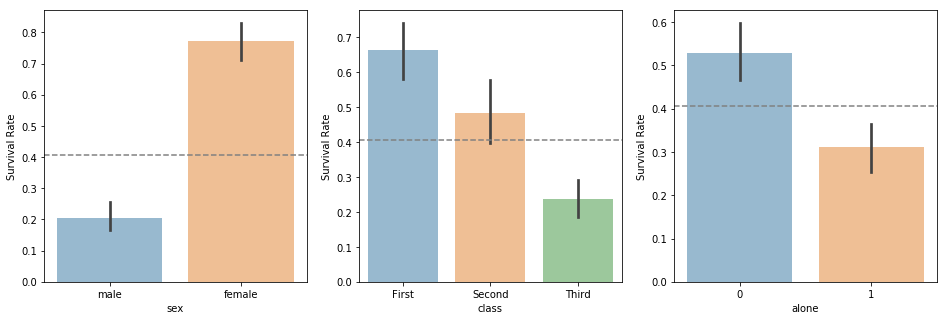

In [19]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [24]:
pd.crosstab(df_family['class'], df_family.embarked, margins=True)


embarked,C,Q,S,All
class,,,,
First,41,2,57,100
Second,11,0,69,80
Third,20,7,103,130
All,72,9,229,310


In [25]:
pd.crosstab(train_df.pclass, train_df.survived, margins=True).style.background_gradient(cmap='YlOrRd')


survived,0,1,All
pclass,,,
1,44,87,131
2,61,57,118
3,191,59,250
All,296,203,499


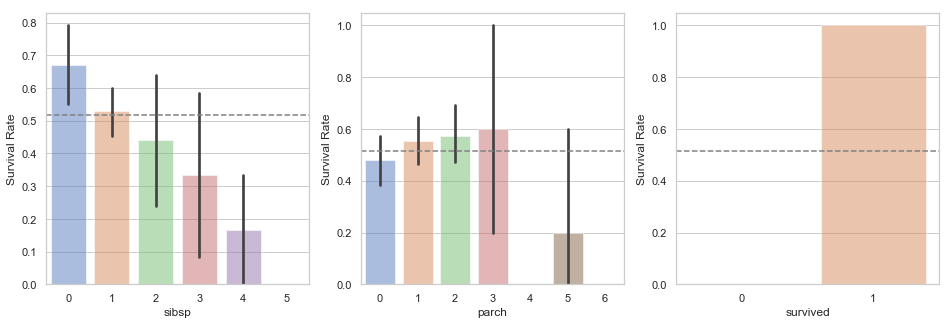

In [26]:
features = ['sibsp', 'parch', 'survived']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [48]:
numeric_cols = []
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        numeric_cols.append(col)
    if train_df[col].dtype == 'float64':
        numeric_cols.append(col)
print(numeric_cols)

# for col in numeric_cols:
#     print('The range of',col, 'is ',(df_excel[col].max() - df_excel[col].min()))


['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 555 to 452
Data columns (total 12 columns):
passenger_id    499 non-null int64
survived        499 non-null int64
pclass          499 non-null int64
sex             499 non-null object
age             499 non-null float64
sibsp           499 non-null int64
parch           499 non-null int64
fare            499 non-null float64
embarked        498 non-null object
class           499 non-null object
embark_town     499 non-null object
alone           499 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 70.7+ KB


In [49]:
df_melted = pd.melt(train_df, id_vars='passenger_id', value_vars=('survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone'), var_name='passenger info')

df_melted.sample(10)

,passenger_id,passenger info,value
129,207,survived,1.0
2485,288,parch,0.0
3377,333,alone,0.0
2539,307,fare,108.9
1291,280,age,65.0
3454,558,alone,0.0
1555,362,sibsp,0.0
1632,139,sibsp,0.0
2205,610,parch,5.0
567,414,pclass,3.0


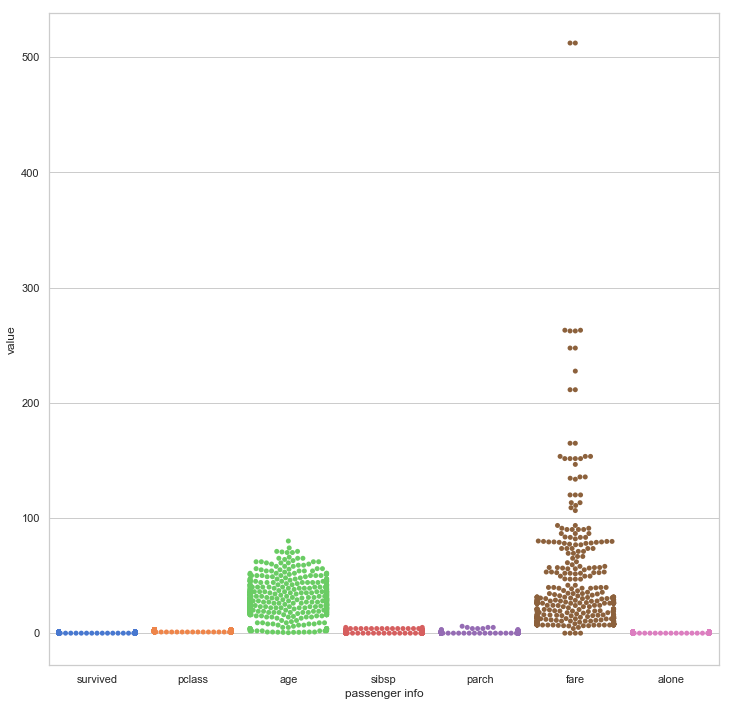

In [52]:

plt.figure(figsize=(12,12))
sns.swarmplot(x="passenger info", y='value', data=df_melted)


In [53]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone'],
      dtype='object')

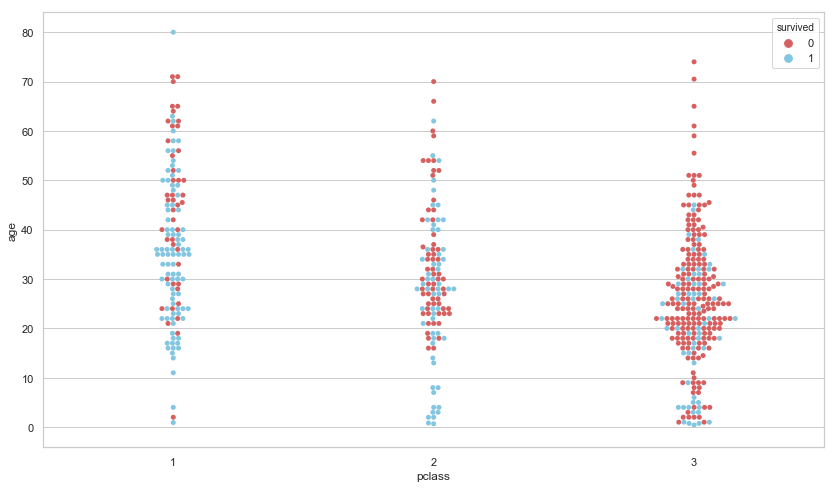

In [54]:
plt.figure(figsize=(14,8))

sns.swarmplot(x='pclass', y='age', hue='survived',
              palette=["r", "c"], data=train_df)

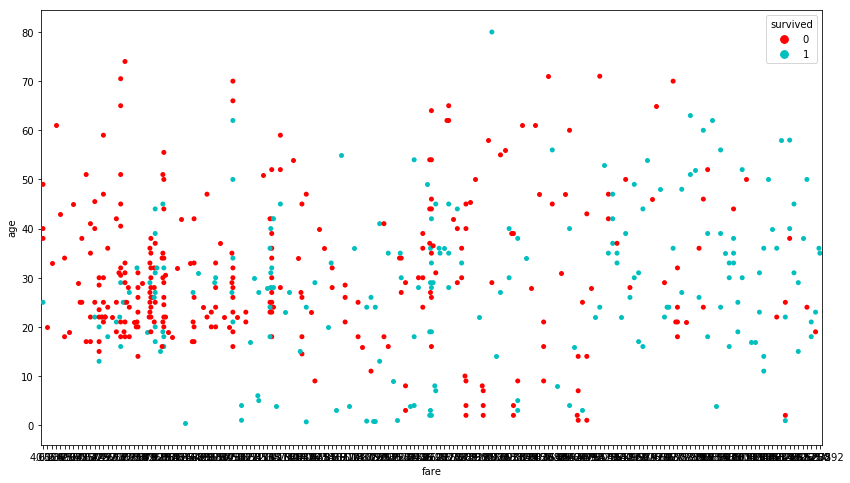

In [21]:
plt.figure(figsize=(14,8))

sns.swarmplot(x='fare', y='age', hue='survived',
              palette=["r", "c"], data=train_df)

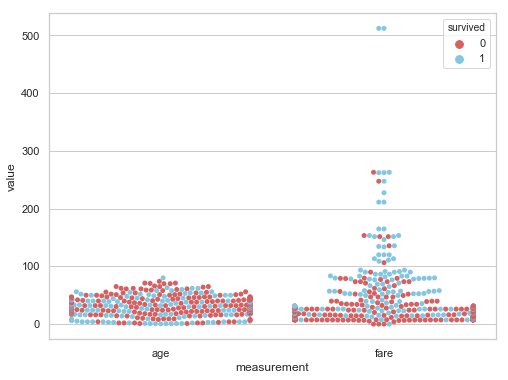

In [22]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[['survived','age','fare']], "survived", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="survived",
              palette=["r", "c", "y"], data=df_melt)